In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv('barang_keluar.csv', delimiter=';', skiprows=0, low_memory=False)

df.head()

,kode_barang,nama_barang,jumlah_transaksi,total_penjualan,rata_rata
0,2 TANG BLACK TEA 1 RENCENG (ISI 10),2 TANG BLACK TEA 1 RENCENG (ISI 10),1,1,1.0000
1,2 TANG MELATI 1 RENCENG (ISI 10),2 TANG MELATI 1 RENCENG (ISI 10),1,1,1.0000
2,AQUA 1500 ML 1 DUS,AQUA 1500 ML 1 DUS,10,11,1.1000
3,RIBUT KILOAN,RIBUT KILOAN,77,83,1.0779
4,7916248823,MINYAK TAWON FF,8,9,1.1250


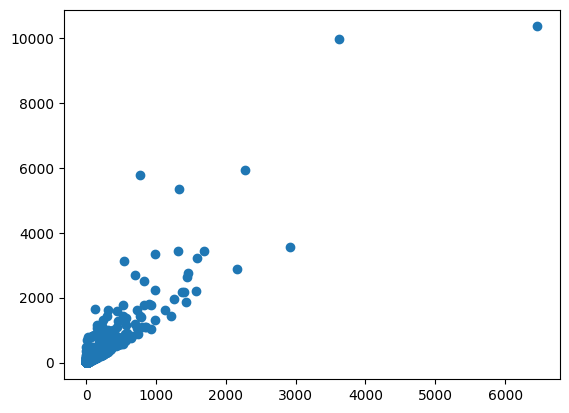

In [3]:
plt.scatter(df['jumlah_transaksi'],df['total_penjualan'])

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['jumlah_transaksi','total_penjualan']])
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,kode_barang,nama_barang,jumlah_transaksi,total_penjualan,rata_rata,cluster
0,2 TANG BLACK TEA 1 RENCENG (ISI 10),2 TANG BLACK TEA 1 RENCENG (ISI 10),1,1,1.0000,0
1,2 TANG MELATI 1 RENCENG (ISI 10),2 TANG MELATI 1 RENCENG (ISI 10),1,1,1.0000,0
2,AQUA 1500 ML 1 DUS,AQUA 1500 ML 1 DUS,10,11,1.1000,0
3,RIBUT KILOAN,RIBUT KILOAN,77,83,1.0779,0
4,7916248823,MINYAK TAWON FF,8,9,1.1250,0


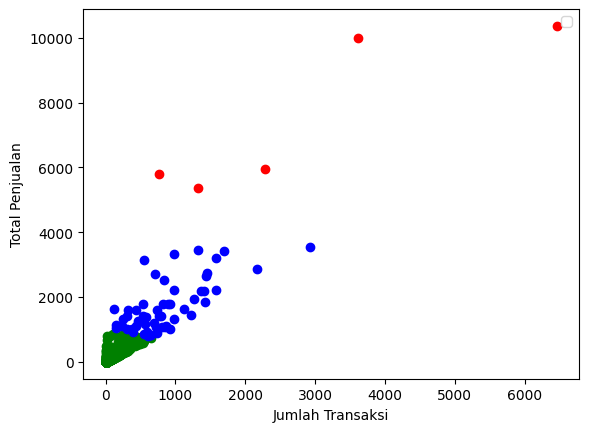

In [7]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
# df4 = df[df.cluster==3]

plt.scatter(df1.jumlah_transaksi,df1['total_penjualan'],color='green')
plt.scatter(df2.jumlah_transaksi,df2['total_penjualan'],color='red')
plt.scatter(df3.jumlah_transaksi,df3['total_penjualan'],color='blue')
# plt.scatter(df4.jumlah_transaksi,df4['total_penjualan'],df4['rata_rata'],color='gray')

plt.xlabel('Jumlah Transaksi')
plt.ylabel('Total Penjualan')
plt.legend()

In [8]:
# Inisialisasi objek MinMaxScaler untuk normalisasi data
scaler = MinMaxScaler()

# Menormalisasi kolom 'total_penjualan' dan 'jumlah_transaksi' untuk mengurangi skewness
scaler.fit(df[['total_penjualan']])

df['total_penjualan_cluster']= scaler.transform(df[['total_penjualan']])

scaler.fit(df[['jumlah_transaksi']])

df['jumlah_transaksi_cluster'] = scaler.transform(df[['jumlah_transaksi']])

# scaler.fit(df['rata_rata'])
# df['rata_rata'] = scaler.transform(df['rata_rata'])
# df